In [1]:
import os
import cv2
from tqdm import tqdm
import numpy as np
import seaborn as sns
from keras.layers import RandomFlip, RandomRotation, RandomContrast, RandomTranslation
from keras.models import Sequential

In [2]:
wd = os.path.sep.join([os.getcwd(), "data"])
train_path = os.path.sep.join([wd, "train"])
test_path = os.path.sep.join([wd, "test"])
images_path = os.path.sep.join([wd, "images"])
items_path = [os.path.sep.join([images_path, image]) for image in os.listdir(images_path)]

train_size = .6

train_target, test_target = [], []

In [8]:
def create_train_test():
    for item_path in tqdm(items_path):
        for label in os.listdir(item_path):
            new_path = os.path.sep.join([item_path, label])
            size_imgs = len(os.listdir(new_path))
            for i, img in enumerate(os.listdir(new_path)):
                _img = cv2.imread(os.path.sep.join([new_path, img]))
                train_set = i < (train_size * size_imgs)
                destination = os.path.sep.join([train_path if train_set else test_path, label, img])
                if train_set:
                    train_target.append(0) if label == "0" else train_target.append(1)
                else:
                    test_target.append(0) if label == "0" else test_target.append(1)
                cv2.imwrite(destination, _img)

def debug_data():
    total_len = len(train_target) + len(test_target)
    train_split = np.unique(train_target, return_counts=True)
    test_split = np.unique(test_target, return_counts=True)
    X_train_len = train_split[1]
    X_test_len = test_split[1]
    print("X_train: 0: ->", X_train_len[0], " 1: ->", X_train_len[1])
    print("X_test:  0: ->", X_test_len[0], " 1: -->", X_test_len[1])
    print("train: ", X_train_len[0]+X_train_len[1], "test: ", X_test_len[0]+X_test_len[1])

In [4]:
create_train_test()

100%|██████████| 279/279 [07:28<00:00,  1.61s/it]

X_train: 0: -> 119353  1: -> 47377
X_test:  0: -> 79385  1: --> 31409


In [9]:
debug_data()

X_train: 0: -> 119353  1: -> 47377
X_test:  0: -> 79385  1: --> 31409
train:  166730 test:  110794


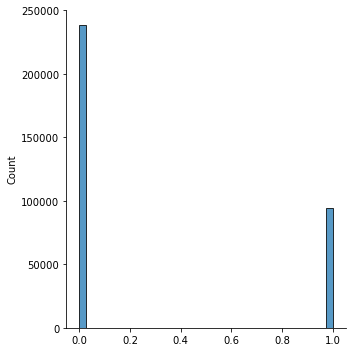

In [6]:
sns.displot(np.hstack((train_target, test_target)))

In [7]:
def data_augmentation(imgs, new_sample_per_imgs):
    """
    Create new samples of bananas
    :param imgs: bananas images
    :param new_sample_per_imgs: number of new sample per images
    :return: X_augmented
    """
    news_images = []
    augmentation = Sequential([
        RandomFlip("horizontal_and_vertical"),
        RandomRotation(0.3),
        RandomTranslation(height_factor=0.25, width_factor=0.25, fill_mode="wrap"),
        RandomContrast(0.2)])
    for i in tqdm(range(len(imgs))):
        for _ in range(new_sample_per_imgs):
            augmented = augmentation(imgs[i])
            news_images.append(np.array(augmented))
    return np.array(news_images)